# Advertising Sales Channel Prediction

##### Problem Statement:

#### Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [1]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df=pd.read_csv('channel_sales.csv')

In [3]:
#view the dataframe
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Here 200 rows and 5 columns are there.

In [4]:
#view all columns
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

#### About columns:

1.Unnamed

It just an serial number so we can drop that column.

2.TV

In this column contain TV channel case study.

3.radio

In this column contain radio case study.

4.newspaper

In this column contain newspaper case study.

5.sales

This is target variable . we have to predict the sales.

## Exploratory Data Analysis(EDA)

#### Checking Shape of Advertising sales channel dataframe

In [5]:
df.shape

(200, 5)

Here 200 rows and 5 variables are there.

#### Checking datatype of all variables

In [6]:
#datatype
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

#### Checking Spaces in Data

In [7]:
#checking spaces in variables
for x in df.columns:
    print(df.loc[df[x]==' '])

Empty DataFrame
Columns: [Unnamed: 0, TV, radio, newspaper, sales]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, TV, radio, newspaper, sales]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, TV, radio, newspaper, sales]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, TV, radio, newspaper, sales]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, TV, radio, newspaper, sales]
Index: []


If  you observe here there is no spaces here.

#### Checking Null values in Dataframe

In [8]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

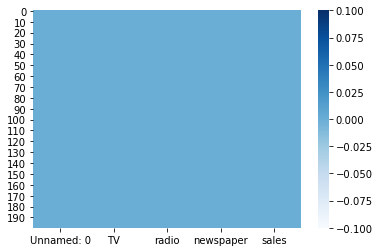

In [9]:
#checking null values using heatmap
sns.heatmap(df.isnull(),cmap='Blues')

There is no Null values here.

#### DataFrame Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


If you observe here there are 200 entries ,(0 to 199).

Data columns (total 5 columns ).

Datatypes are 4 float types and one are integer.

Memory usage is 7.9 KB

In [11]:
#drop Unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
#after droping Unnamed column
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Here 200 rows and 4 columns are there.

### Summary Statistics

In [13]:
#describe the dataframe
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Observations:

1.There are many outliers.

2.Skewness present in newspaper.

3.If you observe 75% and max there are many outliers present in dataset..

#### Correlation

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Here all are positive correlation And TV is good correlation with sales.

<AxesSubplot:>

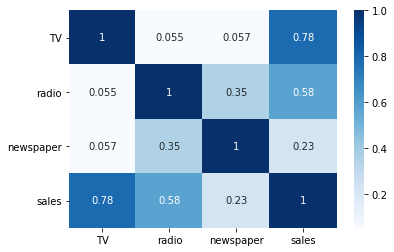

In [15]:
#using heatmap checking correlation
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [16]:
#checking target variable correlaion
target_variable=df.corr()
target_variable['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

If you observe here TV is good relation with sales.

#### Scattor plots

In [17]:
sns.set_theme()

<AxesSubplot:xlabel='TV', ylabel='sales'>

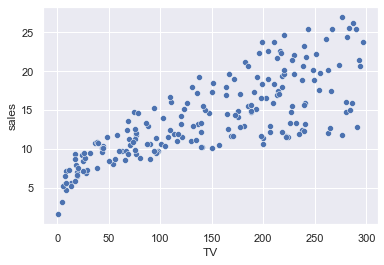

In [18]:
sns.scatterplot(x='TV',y='sales',data=df)

If you observe here there is good correlation with sales.

<AxesSubplot:xlabel='radio', ylabel='sales'>

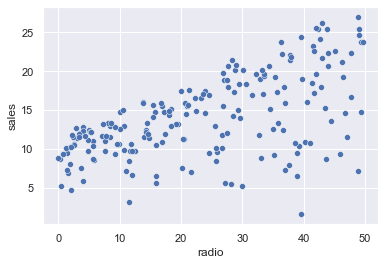

In [19]:
sns.scatterplot(x='radio',y='sales',data=df)

Here also good correlation with sales variable.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

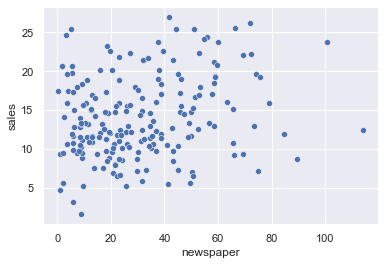

In [20]:
sns.scatterplot(x='newspaper',y='sales',data=df)

### Checking skewness

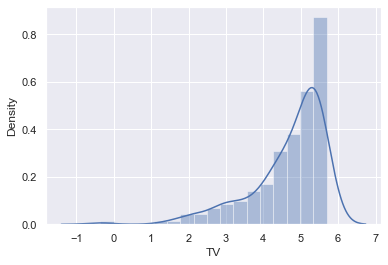

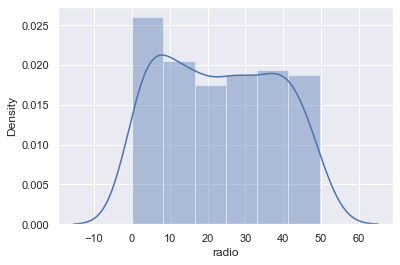

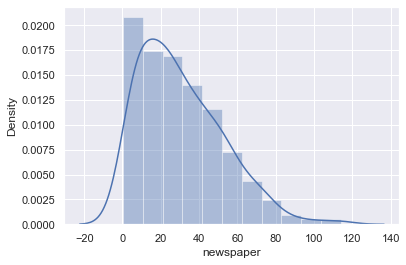

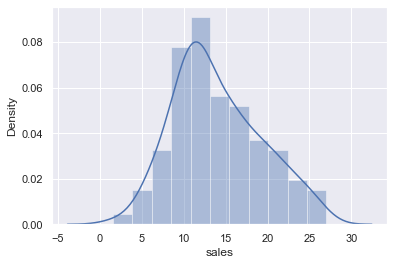

In [76]:
for x in df.columns:
    plt.figure()
    sns.distplot(df[x])

#### Checking outliers

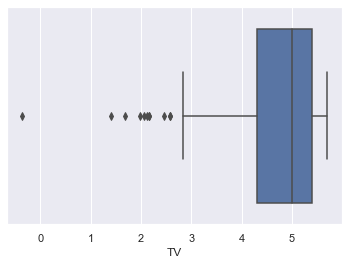

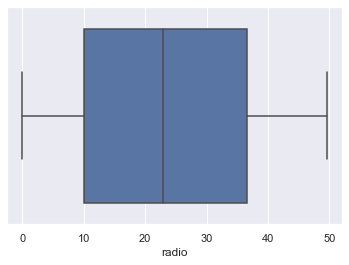

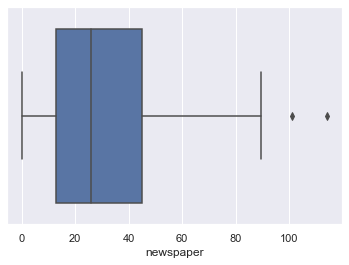

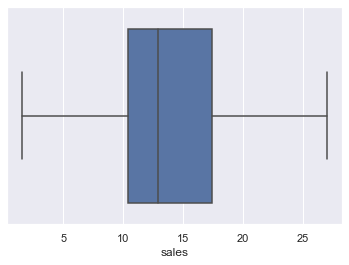

In [77]:
for x in df.columns:
    plt.figure()
    sns.boxplot(df[x])

#### pair plot

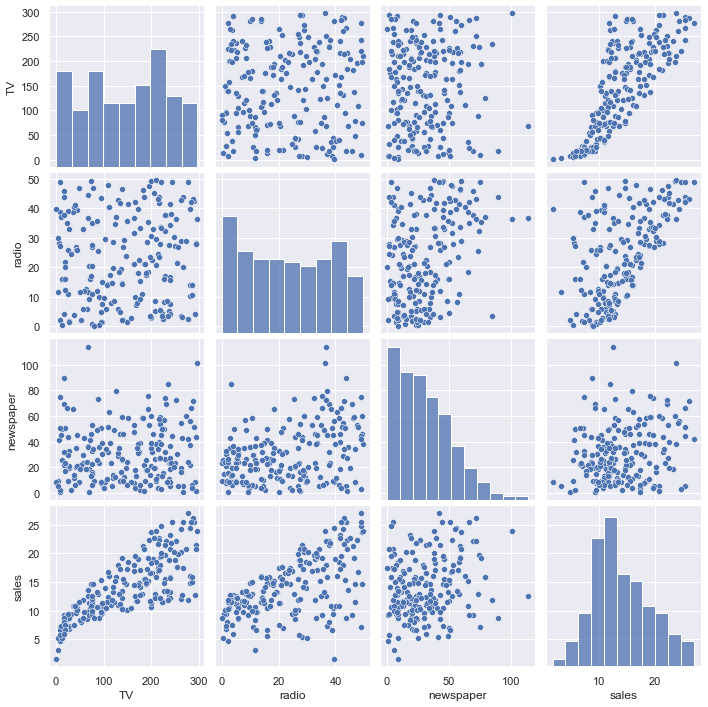

In [21]:
sns.pairplot(df)

#### Checking Ouliers using Box plot

TV              AxesSubplot(0.125,0.536818;0.227941x0.343182)
radio        AxesSubplot(0.398529,0.536818;0.227941x0.343182)
newspaper    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
sales              AxesSubplot(0.125,0.125;0.227941x0.343182)
dtype: object

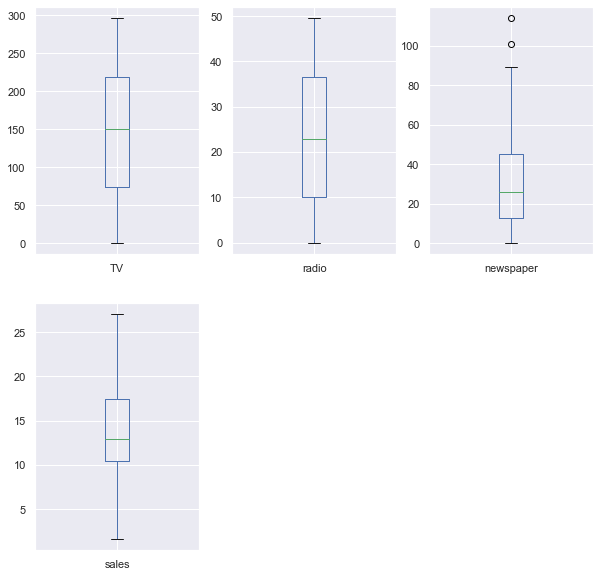

In [22]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

There is no ouliers .

#### Checking Skewness of all columns

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

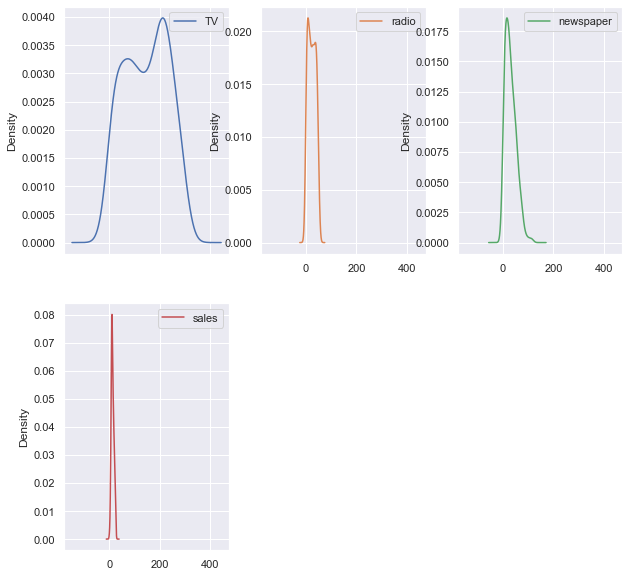

In [23]:
df.plot(kind='kde',subplots=True,layout=(2,3),figsize=(10,10))

There are skewness present all independent variables

#### Variance Inflation Factor(VIF)

In [24]:
x=df.iloc[:,:-1]

In [25]:
x.shape

(200, 3)

In [26]:
y=df.iloc[:,-1]

In [27]:
y.shape

(200,)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [31]:
vif()

,Variables,VIF factor
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


Here radio and newspaper is almost same VIF factor but no need to drop any column bcz already there is 3 indpendent variables are there.

#### Removing Outliers

In [31]:
from scipy.stats import zscore

In [32]:
z=np.abs(zscore(df))

In [33]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


Here only two outliers are there so ignore that.

#### Removing Skewness

In [43]:
from scipy.stats import boxcox

In [44]:
df['TV']=boxcox(df['TV'],0)

In [42]:
from scipy.stats import boxcox_normplot

In [48]:
df['radio']=np.log(df['radio'])

In [49]:
df['newspaper']=np.log(df['newspaper'])

### Model selecion 

Import all Regression model

In [64]:
#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#selection model
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()

In [47]:
list1=[lr,lasso,ridge,dtr,knr,svr]

In [48]:
x=df.iloc[:,0:-1]

In [49]:
x.shape

(200, 3)

In [50]:
y=df.iloc[:,-1]

In [51]:
y.shape

(200,)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [67]:
for model in list1:
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print(model.score(x_train,y_train))
    print('mean_absolute_error',mean_absolute_error(pred,y_test))
    print('mean_squared_error',mean_squared_error(pred,y_test))
    print('r2_score',r2_score(pred,y_test))
    print('------>----->----->----->---->------>------>')

LinearRegression()
0.9062627712253815
mean_absolute_error 1.23570175571868
mean_squared_error 2.7446423424292195
r2_score 0.890650258161682
------>----->----->----->---->------>------>
Lasso()
0.8675569026932017
mean_absolute_error 1.4753806287912257
mean_squared_error 3.923968086606111
r2_score 0.7708561010792192
------>----->----->----->---->------>------>
Ridge()
0.9062389487615404
mean_absolute_error 1.236244533270377
mean_squared_error 2.74784720608307
r2_score 0.8895640266555491
------>----->----->----->---->------>------>
DecisionTreeRegressor()
1.0
mean_absolute_error 0.777272727272727
mean_squared_error 1.1127272727272723
r2_score 0.9612007131501421
------>----->----->----->---->------>------>
KNeighborsRegressor()
0.5309761676633572
mean_absolute_error 3.838636363636364
mean_squared_error 23.107772727272728
r2_score -2.10074755101604
------>----->----->----->---->------>------>
SVR()
0.34229477602333325
mean_absolute_error 3.606583911765712
mean_squared_error 21.4078823338820

#### cross validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
for model in list1:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())
    print('------>----->------->----->------>------>')

LinearRegression()
[0.84910041 0.90607489 0.94808039 0.93505813 0.84852567 0.87853994
 0.90667159 0.90419987 0.89250423 0.8994971 ]
0.896825222202289
------>----->------->----->------>------>
Lasso()
[0.76380349 0.85768022 0.89287693 0.8879252  0.82248941 0.88037384
 0.836797   0.88781136 0.85036856 0.88269745]
0.8562823450084369
------>----->------->----->------>------>
Ridge()
[0.84808922 0.90569328 0.94758639 0.93493677 0.84823251 0.87922258
 0.90746239 0.90479307 0.89239183 0.89957505]
0.8967983087840381
------>----->------->----->------>------>
DecisionTreeRegressor()
[0.97257536 0.96582719 0.98322468 0.94062737 0.93303137 0.95922564
 0.92250044 0.94474587 0.95756851 0.97288229]
0.9552208723321745
------>----->------->----->------>------>
KNeighborsRegressor()
[-0.12604512  0.33103436  0.13206618  0.1467945   0.42182872  0.30493862
 -0.03724446  0.37838691  0.20949851  0.36329475]
0.21245529793629894
------>----->------->----->------>------>
SVR()
[ 0.06785569  0.39335158  0.34066

###### DecisionTreeRegressor is best model for this dataset

In [69]:
dtr=DecisionTreeRegressor()

In [70]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
dtr.score(x_train,y_train)

1.0

In [72]:
pred=dtr.predict(x_test)

In [73]:
print('Predict values:',pred)
print('Actual values',y_test)

Predict values: [ 5.6 11.6 14.1 11.  12.  15.  25.5  9.9 23.8 15.9  9.9 24.2 20.1  8.1
 12.3 11.8 11.7 11.8 23.8 10.9 22.4  9.2 10.6 10.3 14.2  5.9 23.2 21.8
  9.5 15.5 17.  14.4 19.  19.  17.  10.8 12.9  6.6 11.  12.2 14.5 11.8
  5.7 12. ]
Actual values 56      5.5
37     14.7
67     13.4
79     11.0
80     11.8
188    15.9
183    26.2
10      8.6
128    24.7
62     15.7
65      9.3
17     24.4
133    19.6
195     7.6
146    13.2
38     10.1
173    11.7
149    10.1
93     22.2
29     10.5
0      22.1
2       9.3
122    11.6
180    10.5
95     16.9
121     7.0
185    22.6
39     21.5
66      9.5
19     14.6
11     17.4
45     14.9
41     17.1
92     19.4
168    17.1
1      10.4
57     13.2
189     6.7
151    11.6
167    12.2
116    12.2
138     9.6
155     3.2
82     11.3
Name: sales, dtype: float64


In [79]:
print(dtr.score(x_train,y_train))
print('mean_absolute_error',mean_absolute_error(pred,y_test))
print('mean_squared_error',mean_squared_error(pred,y_test))
print('r2_score',r2_score(pred,y_test))

1.0
mean_absolute_error 0.8136363636363636
mean_squared_error 1.2904545454545453
r2_score 0.9539304483129142


### Saving model

In [78]:
import joblib

In [80]:
#save model
joblib.dump(dtr,'sales_channel_dtr.obj')

['sales_channel_dtr.obj']

In [81]:
#load model
sales_load=joblib.load('sales_channel_dtr.obj')

In [83]:
#checking that saved model is working or not
sales_load.predict(x_test)

array([ 5.6, 11.6, 14.1, 11. , 12. , 15. , 25.5,  9.9, 23.8, 15.9,  9.9,
       24.2, 20.1,  8.1, 12.3, 11.8, 11.7, 11.8, 23.8, 10.9, 22.4,  9.2,
       10.6, 10.3, 14.2,  5.9, 23.2, 21.8,  9.5, 15.5, 17. , 14.4, 19. ,
       19. , 17. , 10.8, 12.9,  6.6, 11. , 12.2, 14.5, 11.8,  5.7, 12. ])